In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston=load_boston()

In [3]:
data=boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
key=boston.keys()

In [5]:
key

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
features=pd.DataFrame(data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=["Target"])

In [7]:
data=pd.concat([features,target],axis=1)

In [8]:
correlation=data.corr("pearson")

In [9]:
abs(correlation['Target']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [10]:
X=data["RM"]
Y=data["Target"]
Z=data["LSTAT"]

In [14]:
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())
Z=(Z-Z.min())/(Z.max()-Z.min())

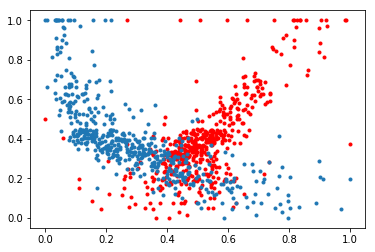

In [16]:
plt.plot(X,Y,'r.',
        Z,Y,'.')

In [17]:
x=np.array(X)
y=np.array(Y)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train)

404

In [20]:
len(x_test)

102

In [21]:
def hypothesis(a,x,b,c):
    return a*x+b*np.power(x,2)+c#ax+bx2+c

In [22]:
def error(a,x,b,c,y):
    e=0
    m=len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b,c)-y[i]),2)
        
    return (1/(2*m))*e

In [23]:
def step_gradient(a,x,b,c,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x)
    
    for i in range(m):
        grad_a +=(1/m)*(hypothesis(a,x[i],b,c)-y[i])*x[i]
        grad_b +=(1/m)*(hypothesis(a,x[i],b,c)-y[i])*(np.power(x[i],2))
        grad_c +=(1/m)*(hypothesis(a,x[i],b,c)-y[i])
        
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    
    return a,b,c

In [24]:
def descend(init_a,x,init_b,init_c,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    
    for i in range(iterations):
        e=error(a,x,b,c,y)
        
        if i%1000==0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b},c:{c}")
    
        a,b,c=step_gradient(a,x,b,c,y,learning_rate)
        
    return a,b,c

In [33]:
a=0.39298666300378365
b=0.5455850542951518
c=0.028652912527089215
learning_rate=0.001
iterations=10000

In [34]:
final_a, final_b, final_c = descend(a,x_train,b,c,y_train,learning_rate,iterations)

Error:0.10312299442576692,a:0.39298666300378365,b:0.5455850542951518,c:0.028652912527089215
Error:0.10311185567646992,a:0.3930446196697111,b:0.5470268385104903,c:0.028189226546888272
Error:0.10310117114678459,a:0.39308409283245804,b:0.5484420512187287,c:0.027743338158754075
Error:0.10309091526403984,a:0.39310562479502215,b:0.5498314510634575,c:0.027314731477495982
Error:0.10308106390222016,a:0.393109742208267,b:0.5511957748030681,c:0.026902905504266775
Error:0.1030715943004818,a:0.3930969565225455,b:0.5525357379422059,c:0.026507373697038338
Error:0.10306248498621845,a:0.39306776442629054,b:0.553852035345013,c:0.02612766355347262
Error:0.10305371570242651,a:0.3930226482719469,b:0.5551453418306874,c:0.02576331620582618
Error:0.10304526733913448,a:0.3929620764896223,b:0.556416312751826,c:0.025413886027544328
Error:0.10303712186867157,a:0.3928865039887917,b:0.5576655845561206,c:0.02507894025120666


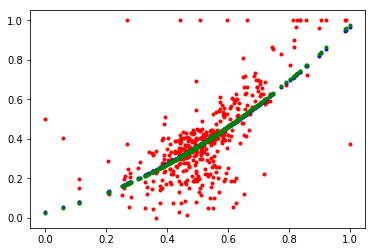

In [41]:
plt.plot(x_train,y_train,'r.',
        x_train, hypothesis(a,x_train,b,c),'b.',
        x_train, hypothesis(final_a,x_train,final_b,final_c),'g.')

In [42]:
y_test[:3]

array([0.33111111, 0.49111111, 0.35777778])

In [43]:
hypothesis(final_a,x_test[:3],final_b,final_c)

array([0.28931675, 0.36115326, 0.30555981])

In [44]:
np.sqrt(error(final_a,x_test,final_b,final_c,y_test))

0.08605877536664697

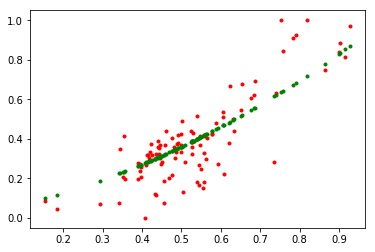

In [45]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, x_test,final_b, final_c), 'g.')